<a href="https://colab.research.google.com/github/Blessing08/alx-pre_course/blob/main/DSN_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT ALL NESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import shap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [ ]:
#creating a copy
df = data.copy()


In [ ]:
df .head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#i need to encode categorical data
df_encoded = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'])

In [ ]:
print(df_encoded .describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [ ]:
df .describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Size of the data
df.shape

(7043, 21)

In [ ]:
# Handling missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Checking for duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Plot distributions of numerical features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

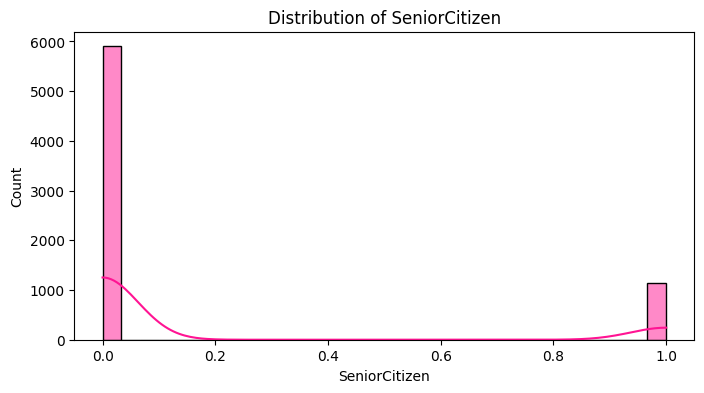

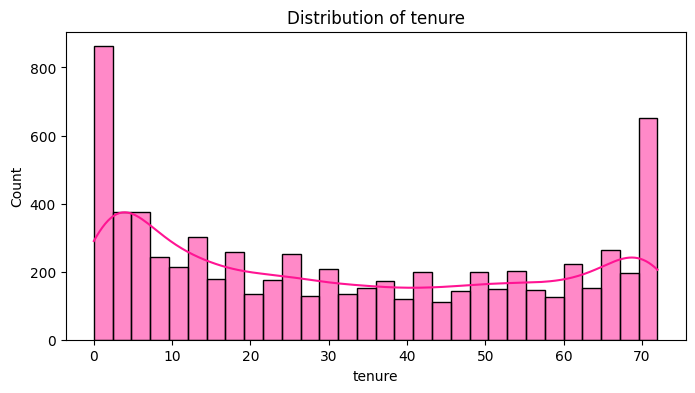

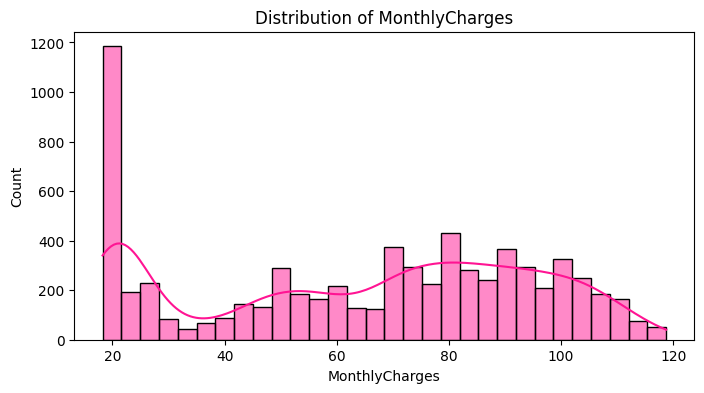

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='deeppink')
    plt.title(f'Distribution of {col}')
    plt.show()

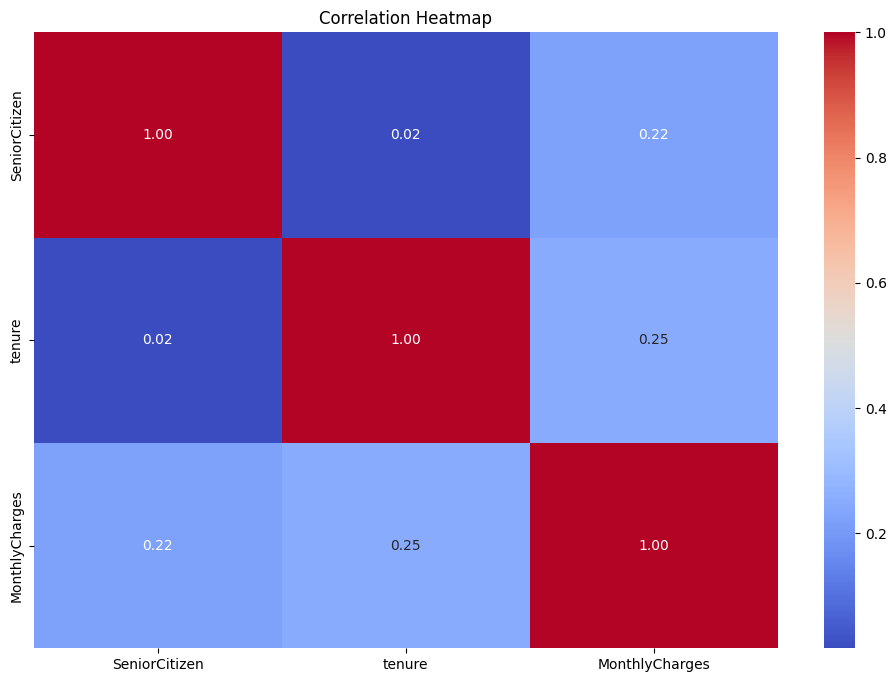

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation = data[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Categorical feature analysis
categorical_cols = data.select_dtypes(include=['object']).columns

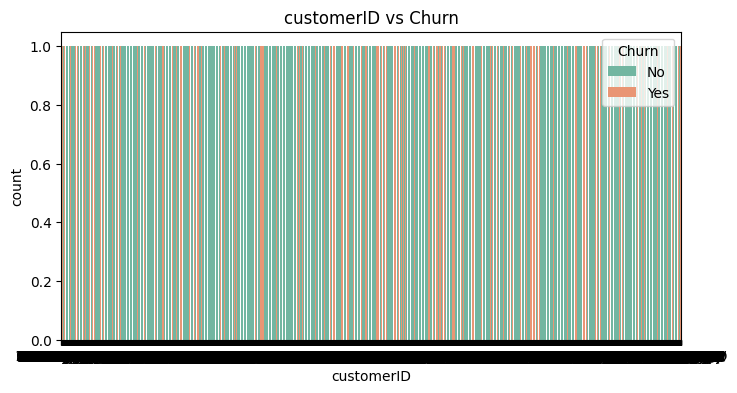

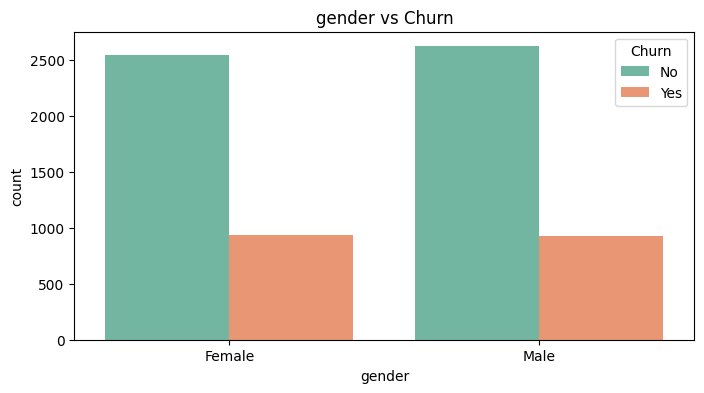

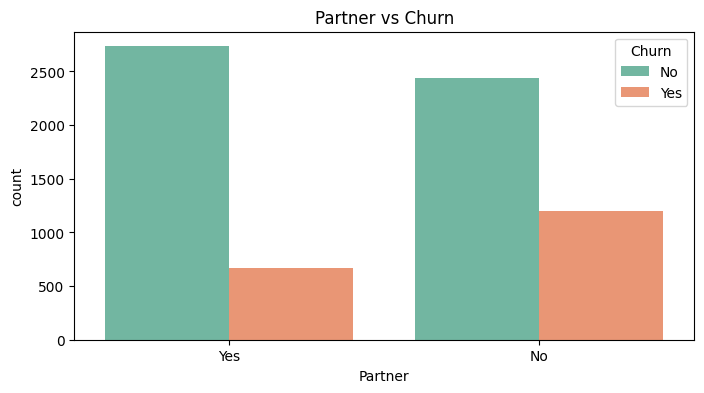

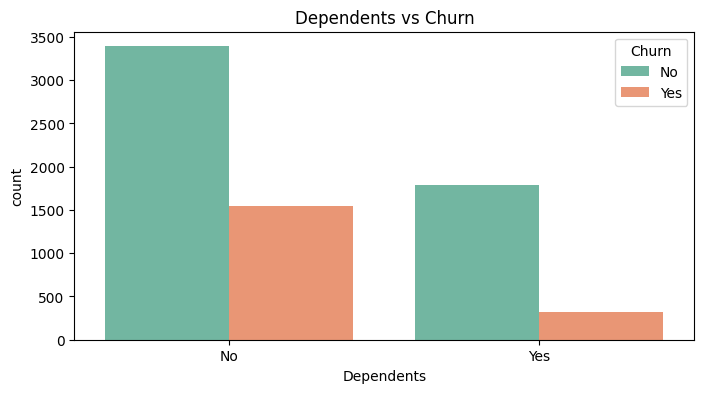

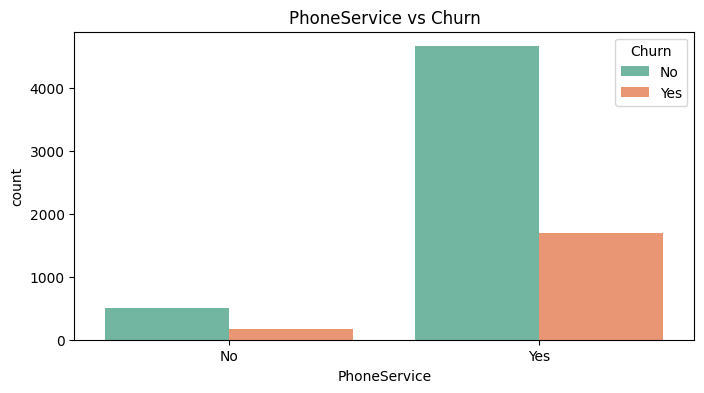

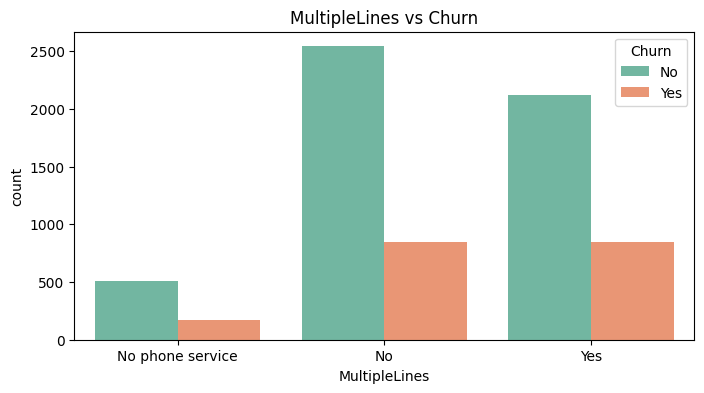

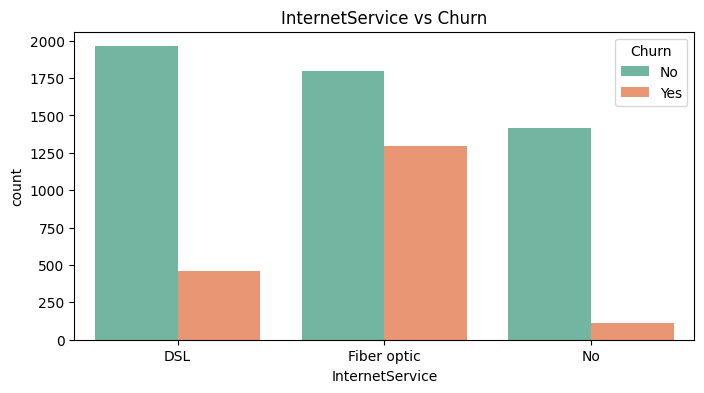

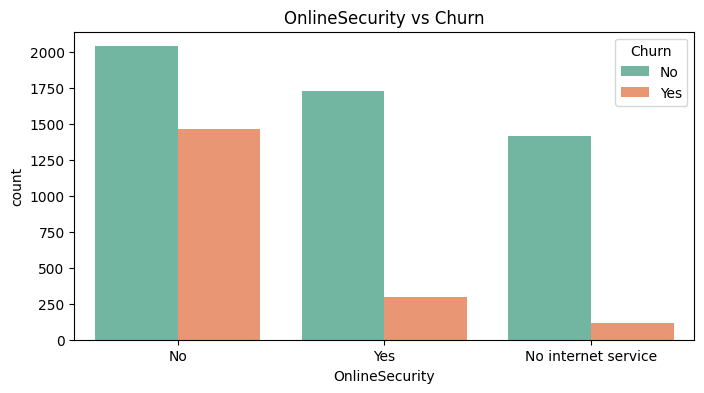

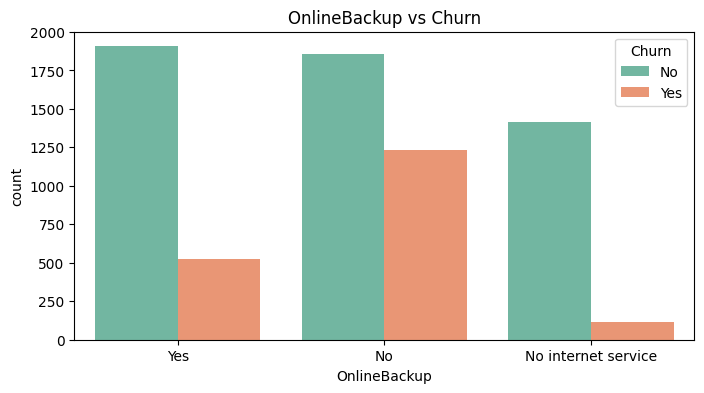

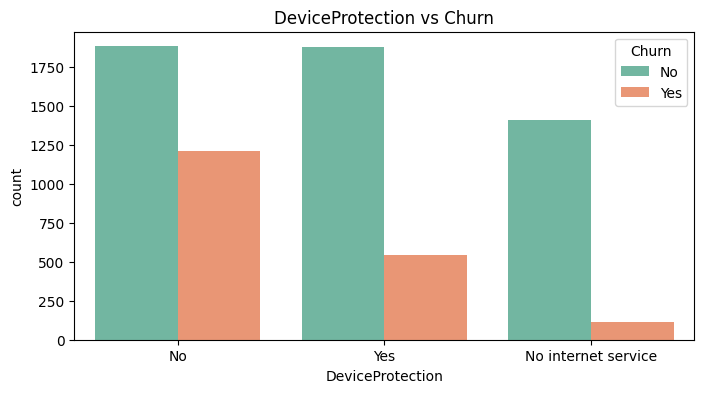

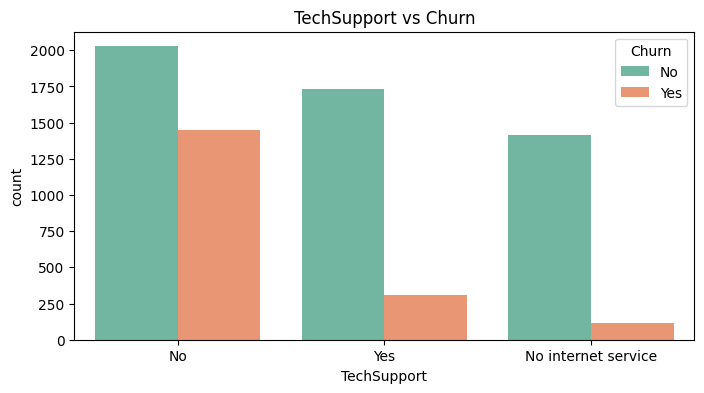

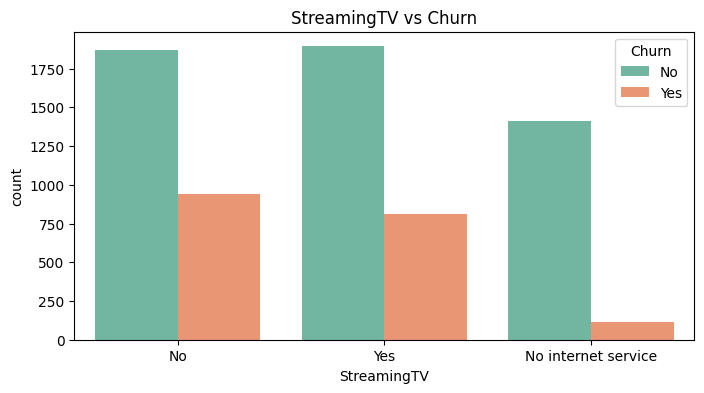

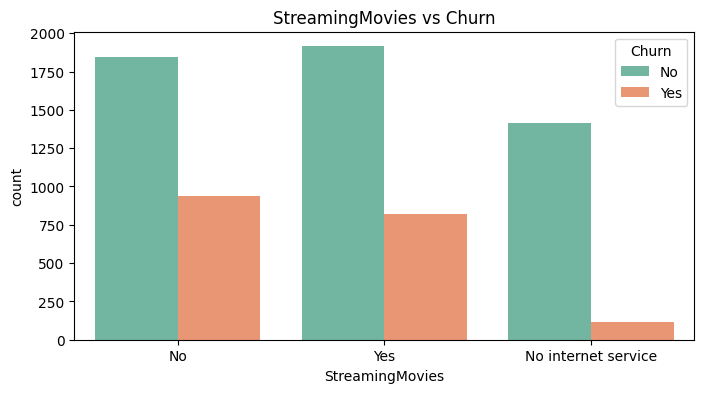

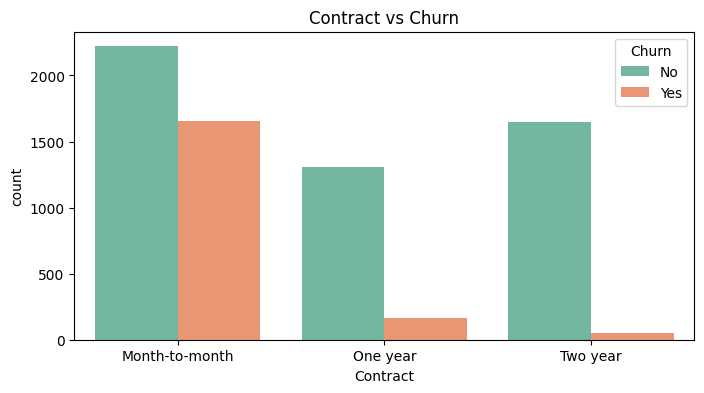

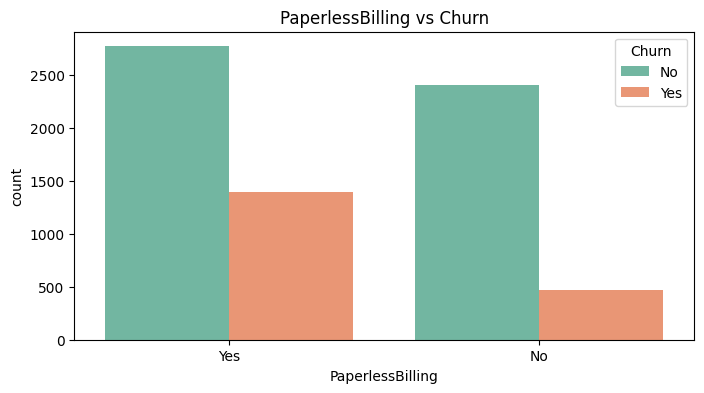

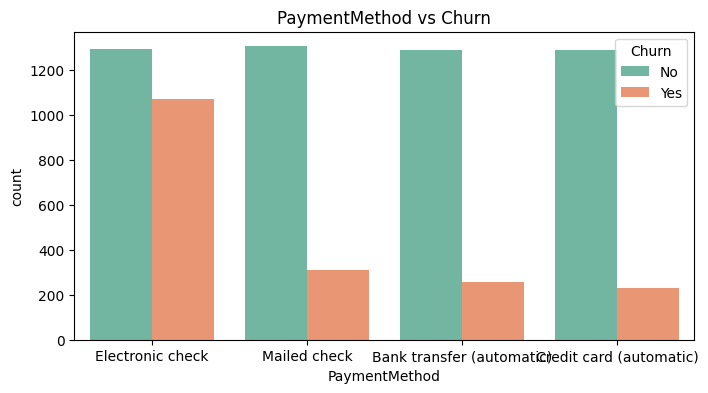

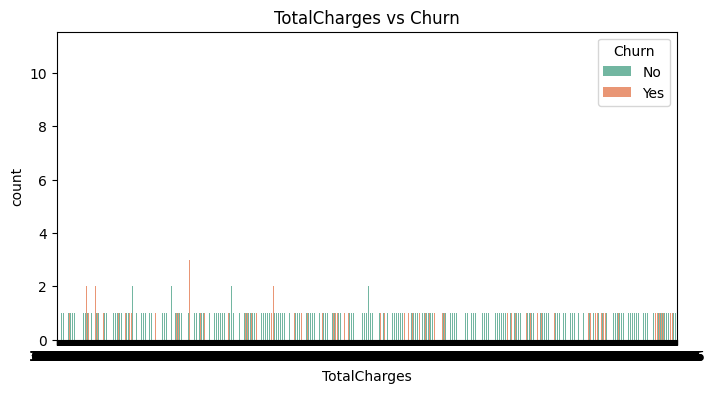

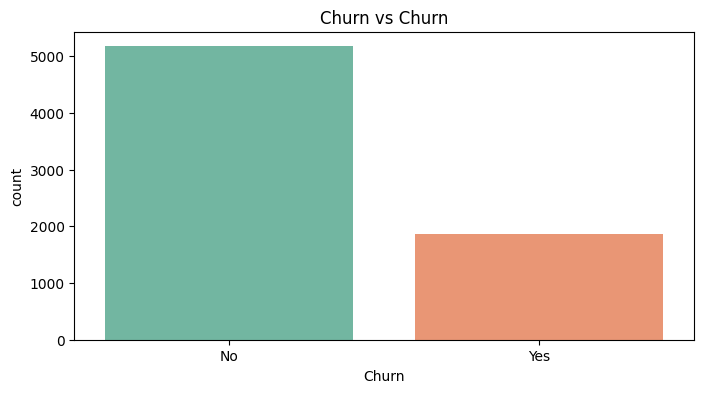

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[col], hue=data['Churn'], palette="Set2")
    plt.title(f'{col} vs Churn')
    plt.show()

In [ ]:
# Conditional Probability: Example - P(Churn | Contract Type)
contract_churn = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(contract_churn)

NameError: name 'contingency_table' is not defined

In [ ]:
# Hypothesis Testing: Example - Are monthly charges significantly different for churned vs non-churned customers?
churned = data[data['Churn'] == 'Yes']['MonthlyCharges']
not_churned = data[data['Churn'] == 'No']['MonthlyCharges']

In [ ]:
# T-test
t_stat, p_val = stats.ttest_ind(churned, not_churned)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

In [ ]:
# Confidence Intervals
def compute_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean - h, mean + h

In [ ]:
ci_churned = compute_confidence_interval(churned)
print(f"95% Confidence Interval for Churned Customers' Monthly Charges: {ci_churned}")

95% Confidence Interval for Churned Customers' Monthly Charges: (np.float64(73.32234641761484), np.float64(75.56031810886991))


In [ ]:
# Chi-Square Test: Example - Relationship between contract type and churn
contingency_table = pd.crosstab(data['Contract'], data['Churn'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, P-Value: {p}")

Chi-Square Statistic: 1184.5965720837926, P-Value: 5.863038300673391e-258


Explanation: Calculating conditional probabilities helps in understanding customer behavior patterns by revealing how likely an event (e.g., churn) is given certain conditions (e.g., contract type). This information can be used to develop targeted retention strategies, such as offering better plans to customers who are more likely to churn based on their contract type.



In [ ]:
# Conditional Probability: Example - P(Churn | Contract Type)
contract_churn = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(contract_churn)

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


Explanation: Logistic Regression is suitable for this binary classification problem because it models the probability of an event occurring as a function of input features. It provides interpretable coefficients and performs well when features have a linear relationship with the log-odds of the target variable.

In [ ]:
# Encoding categorical features
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [ ]:
# Feature Scaling
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
# Splitting data
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

NameError: name 'LogisticRegression' is not defined

In [ ]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[919 117]
 [161 212]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.64      0.57      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



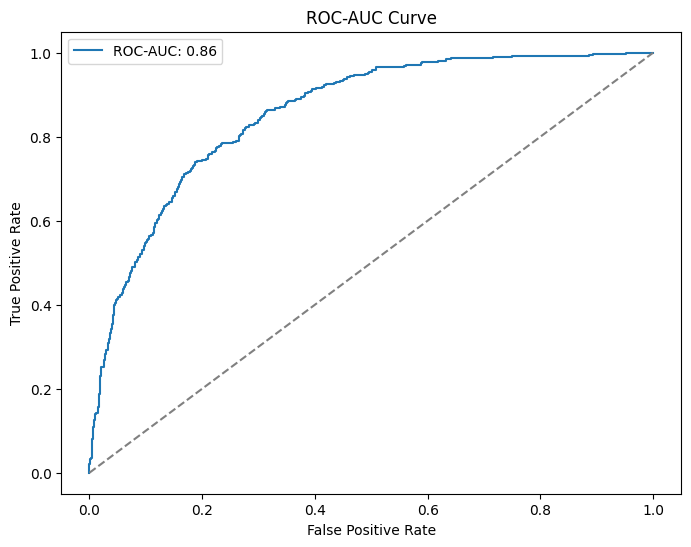

In [ ]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

In [ ]:
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

KeyboardInterrupt: 

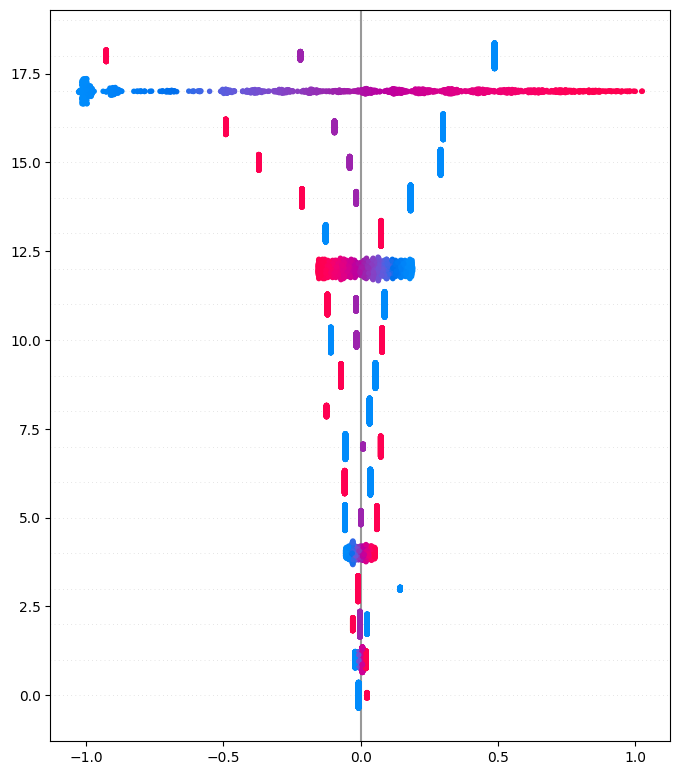

In [ ]:
# Summary Plot
shap.summary_plot(shap_values, X_test)